In [2]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [3]:
df = read_csv('corona_daily.csv', usecols=[3], engine='python', skipfooter=3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  112 non-null    int64
dtypes: int64(1)
memory usage: 1.0 KB


In [4]:
df.head()

,Confirmed
0,24
1,24
2,27
3,27
4,28


In [5]:
data_set = df.values.astype('float32')
data_set

array([[   24.],
       [   24.],
       [   27.],
       [   27.],
       [   28.],
       [   28.],
       [   28.],
       [   28.],
       [   28.],
       [   29.],
       [   30.],
       [   31.],
       [   51.],
       [  104.],
       [  204.],
       [  433.],
       [  602.],
       [  833.],
       [  977.],
       [ 1261.],
       [ 1766.],
       [ 2337.],
       [ 3150.],
       [ 3736.],
       [ 4212.],
       [ 4812.],
       [ 5328.],
       [ 5766.],
       [ 6284.],
       [ 6767.],
       [ 7134.],
       [ 7382.],
       [ 7513.],
       [ 7755.],
       [ 7869.],
       [ 7979.],
       [ 8086.],
       [ 8162.],
       [ 8236.],
       [ 8320.],
       [ 8413.],
       [ 8565.],
       [ 8652.],
       [ 8799.],
       [ 8897.],
       [ 8961.],
       [ 9037.],
       [ 9137.],
       [ 9241.],
       [ 9332.],
       [ 9478.],
       [ 9583.],
       [ 9661.],
       [ 9786.],
       [ 9887.],
       [ 9976.],
       [10062.],
       [10156.],
       [10237.

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
Data_set = scaler.fit_transform(data_set)
Data_set

array([[0.0000000e+00],
       [0.0000000e+00],
       [2.6501762e-04],
       [2.6501762e-04],
       [3.5335682e-04],
       [3.5335682e-04],
       [3.5335682e-04],
       [3.5335682e-04],
       [3.5335682e-04],
       [4.4169603e-04],
       [5.3003523e-04],
       [6.1837444e-04],
       [2.3851590e-03],
       [7.0671379e-03],
       [1.5901061e-02],
       [3.6130741e-02],
       [5.1060069e-02],
       [7.1466424e-02],
       [8.4187277e-02],
       [1.0927561e-01],
       [1.5388693e-01],
       [2.0432863e-01],
       [2.7614841e-01],
       [3.2791519e-01],
       [3.6996466e-01],
       [4.2296818e-01],
       [4.6855122e-01],
       [5.0724381e-01],
       [5.5300355e-01],
       [5.9567136e-01],
       [6.2809187e-01],
       [6.4999998e-01],
       [6.6157240e-01],
       [6.8295050e-01],
       [6.9302118e-01],
       [7.0273852e-01],
       [7.1219081e-01],
       [7.1890455e-01],
       [7.2544169e-01],
       [7.3286217e-01],
       [7.4107772e-01],
       [7.545052

In [7]:
train_data, test_data = train_test_split(Data_set, test_size=0.2, shuffle=False)
len(train_data), len(test_data)

(89, 23)

In [8]:
"Hello World"

'Hello World'

In [9]:
def create_data_set(data_set, look_back):
    x_data = []
    y_data = []
    for i in range(len(data_set) - look_back):
        data = data_set[i:(i + look_back), 0]
        x_data.append(data)
        y_data.append(data_set[i + look_back, 0])
    return np.array(x_data), np.array(y_data)

In [10]:
look_back = 3
x_train, y_train = create_data_set(train_data, look_back)
x_test, y_test = create_data_set(test_data, look_back)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((86, 3), (86,), (20, 3), (20,))

In [15]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
X_train.shape, X_test.shape

((86, 1, 3), (20, 1, 3))

In [17]:
model = Sequential(name='coronada')
model.add(SimpleRNN(3, input_shape=(1, look_back)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "coronada"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 3)                 21        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
86/86 [==============================] - 1s 808us/step - loss: 0.2195
Epoch 2/100
86/86 [==============================] - 0s 884us/step - loss: 0.0446
Epoch 3/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 4/100
86/86 [==============================] - 0s 913us/step - loss: 0.0126
Epoch 5/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 6/100
86/86 [==============================] - 0s 962us/step - loss: 0.0057
Epoch 7/100
86/86 [==============================] - 0s 996us/step - loss: 0.0039
Epoch 8/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 9/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 10/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 11/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 12/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 13/100
86/86 [=======

In [21]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict2 = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([y_train])
test_predict2 = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([y_test])
train_predict2

1/1 [==============================] - 0s 17ms/step


array([[   96.15985 ],
       [   95.962494],
       [   96.49401 ],
       [   96.428055],
       [   96.15513 ],
       [   96.15513 ],
       [   96.15513 ],
       [   97.50643 ],
       [   98.79246 ],
       [   99.804886],
       [  126.49412 ],
       [  196.5076  ],
       [  322.59894 ],
       [  610.3285  ],
       [  796.74646 ],
       [ 1035.4667  ],
       [ 1170.8179  ],
       [ 1481.6921  ],
       [ 2100.3977  ],
       [ 2756.6997  ],
       [ 3662.72    ],
       [ 4257.445   ],
       [ 4663.406   ],
       [ 5276.343   ],
       [ 5806.301   ],
       [ 6211.908   ],
       [ 6729.265   ],
       [ 7216.8555  ],
       [ 7546.6973  ],
       [ 7739.5127  ],
       [ 7815.2256  ],
       [ 8048.482   ],
       [ 8154.3438  ],
       [ 8230.416   ],
       [ 8331.355   ],
       [ 8396.089   ],
       [ 8459.124   ],
       [ 8540.9375  ],
       [ 8633.549   ],
       [ 8792.825   ],
       [ 8872.969   ],
       [ 9010.059   ],
       [ 9103.668   ],
       [ 91

In [22]:
train_score = math.sqrt(mean_squared_error(Y_train[0], train_predict2[:,0]))
train_score

96.09224048649949

In [23]:
test_score = math.sqrt(mean_squared_error(Y_test[0], test_predict2[:,0]))
test_score

96.19334507894666

In [24]:
train_predict_plot = np.empty_like(data_set)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back: len(train_predict2) + look_back, :] = train_predict2

In [25]:
test_predict_plot = np.empty_like(data_set)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict2) + look_back * 2 : len(data_set), :] = test_predict2

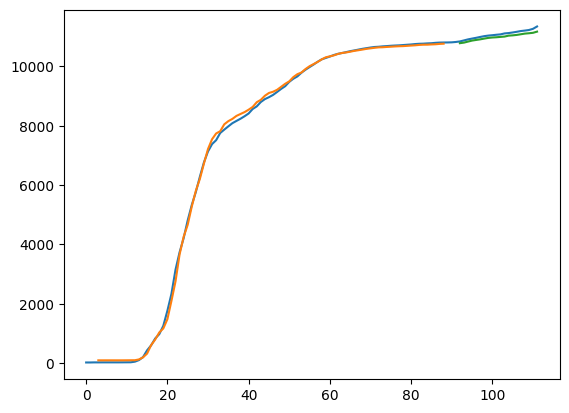

In [30]:
plt.plot(data_set)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()